In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv(r"/home/mitraa/Jupyter Notebook/MLP/P1/Medical Insurance Cost Prediction/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical feature:

-Sex

-Smoker

-Region

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/home/mitraa/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


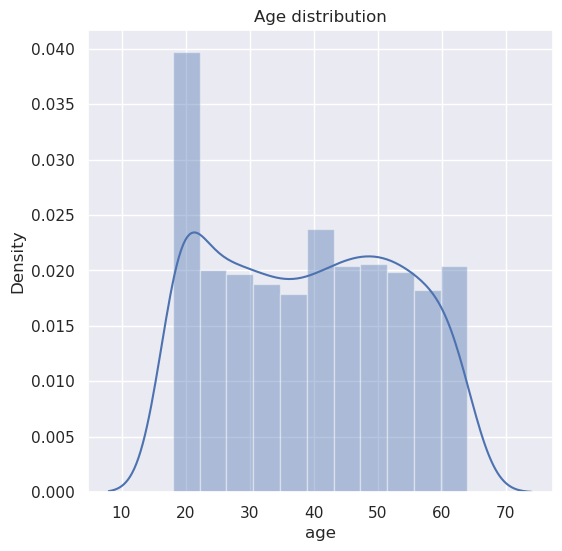

In [14]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

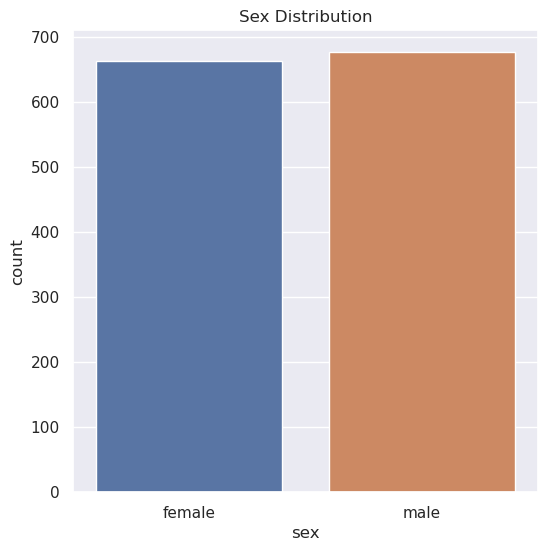

In [25]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')
plt.show()

In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

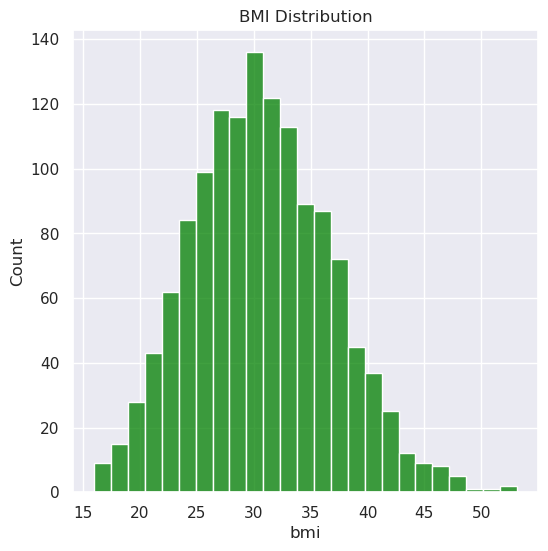

In [21]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(data['bmi'],color='green')
plt.title('BMI Distribution')
plt.show()

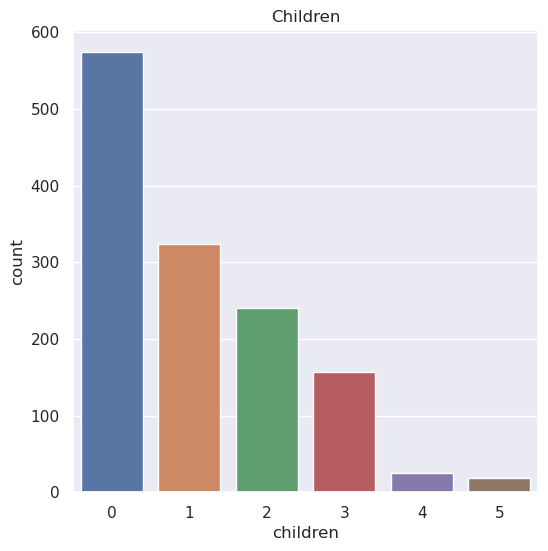

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [18]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

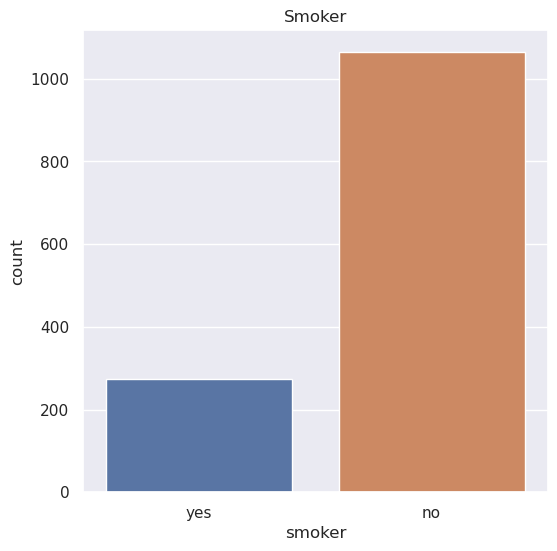

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('Smoker')
plt.show()

In [26]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

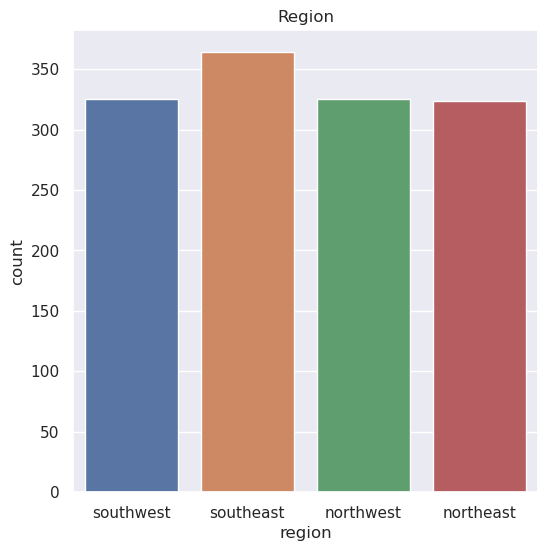

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

In [28]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/home/mitraa/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


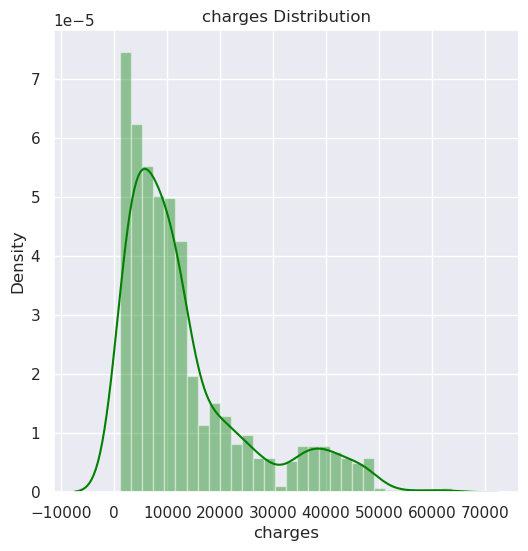

In [30]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'],color='green')
plt.title('charges Distribution')
plt.show()

Data Preprocessing

Encoding the categorical features

In [33]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0, 'no':1}},inplace=True)
data.replace({'region':{'southwest':1,'southeast':0,'northeast':2, 'northwest':3}},inplace=True)

Splitting the features and target

In [34]:
X = data.drop(columns='charges',axis=1)
Y = data['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
